In [423]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import plot, iplot
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from pca import pca
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [425]:
!pip install pca

# M08 T01

<u>*Exercice 1*<u>

*Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.*

In [426]:
# read the file

fb_posts = pd.read_csv(r"C:\Users\Cristina\OneDrive\Documentos\Curs DS IT Academy\M08T01\Publicacions Facebook Thailandia.csv")
fb_posts

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


This dataset has been obtained from UCI ML Repository. https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers.

We have the following features:

-**status_id:** id of the status published.


-**status_type:** this refers to the type of facebook element to analyse: photo, video, status or link.


-**status_published** month/day/year and hour the status was published.


-**num_reactions:** number of reactions that the status got: it is the addition of the likes, loves, wows, hahas, sads and angrys.


-**num_comments:** number of comments that the status got.


-**num_shares:** number of shares that the status got.


-**num_likes:** number of likes that the status got.


-**num_loves:** number of loves that the status got.


-**num_wows:** number of wows that the status got.


-**num_hahas:** number of hahas that the status got.


-**num_sads:** number of sads that the status got.


-**num_angrys:** number of angrys that the status got.


-**Column1/2/3/4:** this columns have no data or info. 

In [427]:
fb_posts.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

The last 4 columns, named Column1, Column2, Column3 and Column4, are just NaNs so we will drop them as they don't have any info. 

In [428]:
fb_posts.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
fb_posts

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


Most of the algorithms work better with numerical inputs. Therefore, we should convert text/categorical data into numerical data.

In [429]:
fb_posts['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [430]:
fb_posts_classes = fb_posts.copy()

In [431]:
# creating initial dataframe
status_types = ('video','photo','link','status')
status_types = pd.DataFrame(status_types, columns=['status_type'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
status_types['types'] = labelencoder.fit_transform(status_types['status_type'])

In [432]:
status_types.sort_values(by="types", ascending=True)

,status_type,types
2,link,0
1,photo,1
3,status,2
0,video,3


In [433]:
# label encoding to convert the status_type to numerical data

le=LabelEncoder()
fb_posts_classes['status_type']=le.fit_transform(fb_posts_classes['status_type'])
fb_posts_classes

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,1,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,1,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,1,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,1,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [434]:
fb_posts_classes['status_published'] = pd.to_datetime(fb_posts_classes['status_published'])

fb_posts_classes['year'] = fb_posts_classes['status_published'].dt.year
fb_posts_classes['month'] = fb_posts_classes['status_published'].dt.month
fb_posts_classes['dayofweek'] = fb_posts_classes['status_published'].dt.dayofweek # 0 is Monday, 7 is Sunday.
fb_posts_classes['hour'] = fb_posts_classes['status_published'].dt.hour

fb_posts_classes.drop(['status_published'], axis=1, inplace=True)

fb_posts_classes

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
0,246675545449582_1649696485147474,3,529,512,262,432,92,3,1,1,0,2018,4,6,6
1,246675545449582_1649426988507757,1,150,0,0,150,0,0,0,0,0,2018,4,5,22
2,246675545449582_1648730588577397,3,227,236,57,204,21,1,1,0,0,2018,4,5,6
3,246675545449582_1648576705259452,1,111,0,0,111,0,0,0,0,0,2018,4,5,2
4,246675545449582_1645700502213739,1,213,0,0,204,9,0,0,0,0,2018,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,1,89,0,0,89,0,0,0,0,0,2016,9,5,2
7046,1050855161656896_1061334757275603,1,16,0,0,14,1,0,1,0,0,2016,9,4,11
7047,1050855161656896_1060126464063099,1,2,0,0,1,1,0,0,0,0,2016,9,2,23
7048,1050855161656896_1058663487542730,1,351,12,22,349,2,0,0,0,0,2016,9,1,0


In [435]:
fb_posts_classes = fb_posts_classes[['status_id', 'status_type', 'dayofweek', 'month', 'year', 
                                     'hour', 'num_reactions', 'num_comments', 'num_shares',
                                    'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

fb_posts_classes

,status_id,status_type,dayofweek,month,year,hour,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,3,6,4,2018,6,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,1,5,4,2018,22,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,3,5,4,2018,6,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,1,5,4,2018,2,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,1,2,4,2018,3,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,1,5,9,2016,2,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,1,4,9,2016,11,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,1,2,9,2016,23,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,1,1,9,2016,0,351,12,22,349,2,0,0,0,0


We drop the status_id because it is a variable that we will not use.

In [436]:
fb_posts_classes.drop(['status_id'], axis=1, inplace=True)
fb_posts_classes

,status_type,dayofweek,month,year,hour,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,6,4,2018,6,529,512,262,432,92,3,1,1,0
1,1,5,4,2018,22,150,0,0,150,0,0,0,0,0
2,3,5,4,2018,6,227,236,57,204,21,1,1,0,0
3,1,5,4,2018,2,111,0,0,111,0,0,0,0,0
4,1,2,4,2018,3,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1,5,9,2016,2,89,0,0,89,0,0,0,0,0
7046,1,4,9,2016,11,16,0,0,14,1,0,1,0,0
7047,1,2,9,2016,23,2,0,0,1,1,0,0,0,0
7048,1,1,9,2016,0,351,12,22,349,2,0,0,0,0


In [437]:
fb_posts_classes.dtypes

status_type      int32
dayofweek        int64
month            int64
year             int64
hour             int64
num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
dtype: object

All attributes are integers now.

In [438]:
fb_posts_classes.describe()

,status_type,dayofweek,month,year,hour,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.704965,3.015035,6.577730,2016.382128,7.829504,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,0.942399,2.012812,3.587108,1.943176,6.886893,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,2016.000000,2.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,6.000000,2017.000000,7.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,5.000000,10.000000,2018.000000,9.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,6.000000,12.000000,2018.000000,23.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Next we check how many status of each type we have in our dataset.

In [439]:
fb_posts_classes['status_type'].value_counts()

1    4288
3    2334
2     365
0      63
Name: status_type, dtype: int64

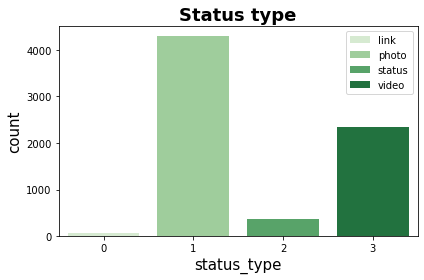

In [440]:
ax = sns.countplot(x='status_type', hue='status_type', dodge=False, data=fb_posts_classes, palette='Greens')
ax.set_title('Status type', fontsize=18, fontweight='bold', color='black')
ax.set_xlabel('status_type', fontsize=15, color='black')
ax.set_ylabel('count', fontsize=15, color='black')
ax.legend(labels = ['link', 'photo', 'status', 'video'])


plt.tight_layout()
plt.show()

In [441]:
aux=fb_posts_classes[fb_posts_classes["status_type"] == 0]

Q1 = aux.quantile(0.25)
Q3 = aux.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux < (Q1 - 1.5 * IQR)) |(aux > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')

Total number of outliers:
status_type       0
dayofweek         0
month             0
year              0
hour              0
num_reactions    14
num_comments      7
num_shares        6
num_likes        14
num_loves        14
num_wows          6
num_hahas         2
num_sads          0
num_angrys        0
dtype: int64



In [442]:
aux1=fb_posts_classes[fb_posts_classes["status_type"] == 1]

Q1 = aux1.quantile(0.25)
Q3 = aux1.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux1 < (Q1 - 1.5 * IQR)) |(aux1 > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')

Total number of outliers:
status_type        0
dayofweek          0
month              0
year               0
hour             681
num_reactions    540
num_comments     450
num_shares       527
num_likes        540
num_loves        677
num_wows         836
num_hahas        212
num_sads         122
num_angrys        38
dtype: int64



In [443]:
aux2=fb_posts_classes[fb_posts_classes["status_type"] == 2]

Q1 = aux2.quantile(0.25)
Q3 = aux2.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux2 < (Q1 - 1.5 * IQR)) |(aux2 > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')

Total number of outliers:
status_type       0
dayofweek         0
month             0
year              0
hour              0
num_reactions    31
num_comments     55
num_shares       56
num_likes        31
num_loves        67
num_wows         78
num_hahas        22
num_sads         37
num_angrys        6
dtype: int64



In [444]:
aux3=fb_posts_classes[fb_posts_classes["status_type"] == 3]

Q1 = aux3.quantile(0.25)
Q3 = aux3.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux3 < (Q1 - 1.5 * IQR)) |(aux3 > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')

Total number of outliers:
status_type        0
dayofweek          0
month              0
year             343
hour             264
num_reactions    224
num_comments     236
num_shares       173
num_likes        251
num_loves        160
num_wows         299
num_hahas        166
num_sads         448
num_angrys       379
dtype: int64



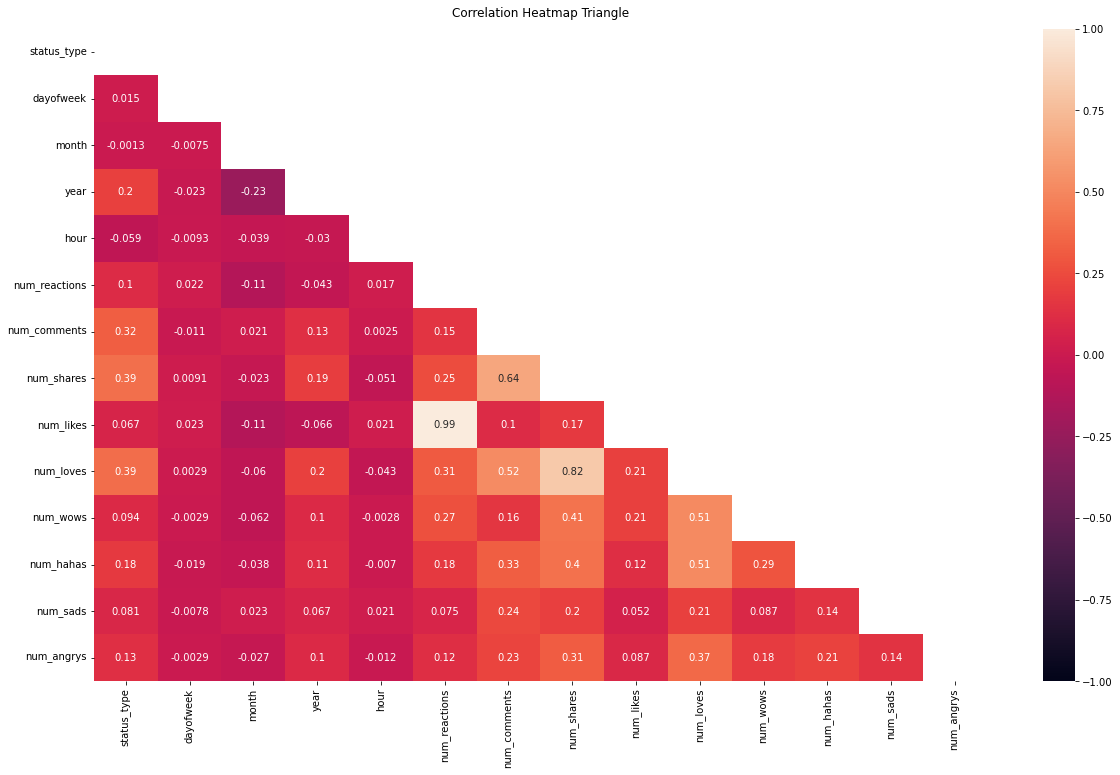

In [445]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 12))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(fb_posts_classes.corr(), vmin=-1, vmax=1, annot=True, mask= np.triu(fb_posts_classes.corr()))
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap Triangle', fontdict={'fontsize':12}, pad=12);

## Feature engineering

#### Scaling

We will use Robust Scaler as we have outliers in our data.

In [446]:
scaled_features_rs = ['status_type','dayofweek', 'month', 'year', 'hour', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 
                      'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

fb_posts_classes_scaled = fb_posts_classes.copy()
scaler = RobustScaler()
fb_posts_classes_scaled[scaled_features_rs] = scaler.fit_transform(fb_posts_classes_scaled[scaled_features_rs])
fb_posts_classes_scaled

,status_type,dayofweek,month,year,hour,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.0,0.75,-0.285714,0.5,-0.142857,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0
1,0.0,0.50,-0.285714,0.5,2.142857,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0
2,1.0,0.50,-0.285714,0.5,-0.142857,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0
3,0.0,0.50,-0.285714,0.5,-0.714286,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0
4,0.0,-0.25,-0.285714,0.5,-0.571429,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.0,0.50,0.428571,-0.5,-0.714286,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0
7046,0.0,0.25,0.428571,-0.5,0.571429,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0
7047,0.0,-0.25,0.428571,-0.5,2.285714,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0
7048,0.0,-0.50,0.428571,-0.5,-1.000000,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0


In [447]:
fb_posts_type = fb_posts_classes_scaled.copy()

Finally, we won't use date variables so we will drop them.

In [448]:
fb_posts_type.drop(['dayofweek', 'month', 'year', 'hour'], axis=1, inplace=True)
fb_posts_type

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0
1,0.0,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0
2,1.0,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0
3,0.0,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.0,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0
7046,0.0,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0
7047,0.0,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0
7048,0.0,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0


In [449]:
fb_posts_type['status_type'].value_counts()

 0.0    4288
 1.0    2334
 0.5     365
-0.5      63
Name: status_type, dtype: int64

In [450]:
X = fb_posts_type

#### PCA

First of all, we need to perform **PCA** in our dataset. **Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

In [451]:
fb_post_pca = PCA(svd_solver='randomized', random_state=123)
fb_post_pca.fit(X)

PCA(random_state=123, svd_solver='randomized')

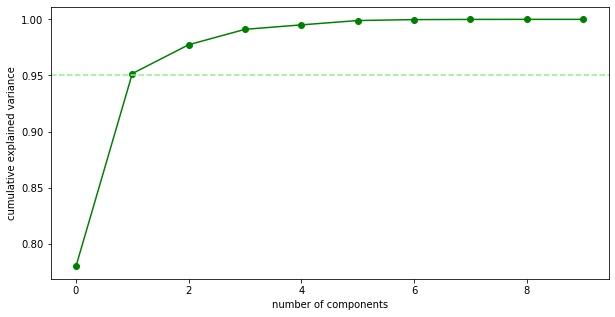

In [452]:
# Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (10,5))

plt.plot(np.cumsum(fb_post_pca.explained_variance_ratio_), marker = "o", color = "green")
plt.axhline(0.95, color = "lightgreen", linestyle = "--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [453]:
# what percentage of variance in data can be explained by first 1,2,3 and 4 principal components respectively?
(fb_post_pca.explained_variance_ratio_[0:1].sum().round(3),
fb_post_pca.explained_variance_ratio_[0:2].sum().round(3),
fb_post_pca.explained_variance_ratio_[0:3].sum().round(3),
fb_post_pca.explained_variance_ratio_[0:4].sum().round(3))

(0.78, 0.952, 0.977, 0.991)

In the plot above and pca explained variance ratio numbers we can see that we reach 95% of explained variance with two principal components.

In [454]:
pca_components = PCA(n_components = 2).fit_transform(X)

Loadings help us understand which is the contribution of the original variables to the principal components.

In [455]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = fb_post_pca.components_
num_pc = fb_post_pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
status_type,0.003896,0.002359,-0.000412,-0.010959,-0.001196,-0.004898,-0.006567,-0.020880,-0.999677,1.041357e-05
num_reactions,0.010807,0.016320,0.059467,-0.001866,0.620711,-0.138061,-0.001483,0.001232,0.000002,7.692399e-01
num_comments,0.759992,-0.647258,0.053523,0.019234,-0.004120,-0.012676,-0.007427,-0.000474,0.001327,-8.104436e-08
num_shares,0.611598,0.695012,-0.334427,0.173758,0.009814,0.027747,0.001402,0.000044,0.002098,1.294307e-06
num_likes,0.008655,0.013703,0.056426,0.008095,0.748215,-0.168841,-0.007589,-0.003905,0.000011,-6.388125e-01
num_loves,0.208528,0.272678,0.548741,-0.734800,-0.091217,-0.178934,-0.014761,-0.017725,0.010737,-1.142872e-02
num_wows,0.058385,0.149853,0.748462,0.639532,-0.069843,0.000790,0.001123,0.000276,-0.006672,-3.807426e-03
num_hahas,0.034210,0.026880,0.130532,-0.141146,0.203718,0.958814,-0.016519,-0.004879,-0.003041,-3.806082e-03
num_sads,0.008320,-0.001499,0.010432,-0.013515,0.008588,0.011511,0.999067,-0.035331,-0.005719,-3.806160e-03


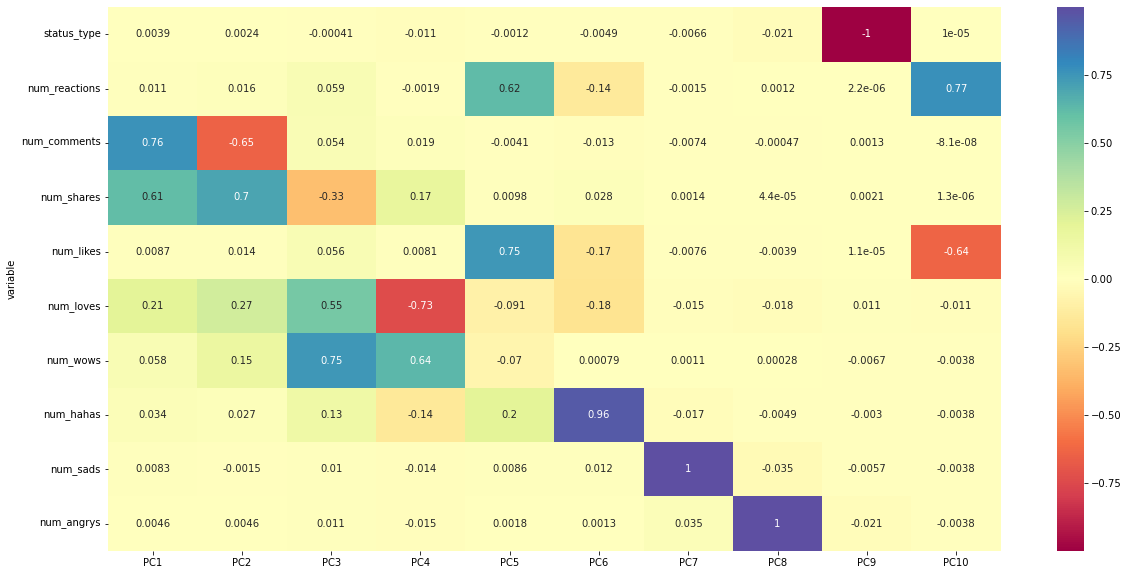

In [456]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,10))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [457]:
#creating a dataframe with the pca numerical only values
pca_df = pd.DataFrame(data = pca_components, columns = ["principal component 1", "principal component 2"])
pca_df.head()

,principal component 1,principal component 2
0,49.100728,37.985931
1,-14.528279,-2.021949
2,3.548261,3.339022
3,-14.532378,-2.028285
4,-13.896540,-1.194413


In biplot, the PC loadings and scores are plotted in a single figure. Biplots are useful to visualize the relationships between variables and observations.

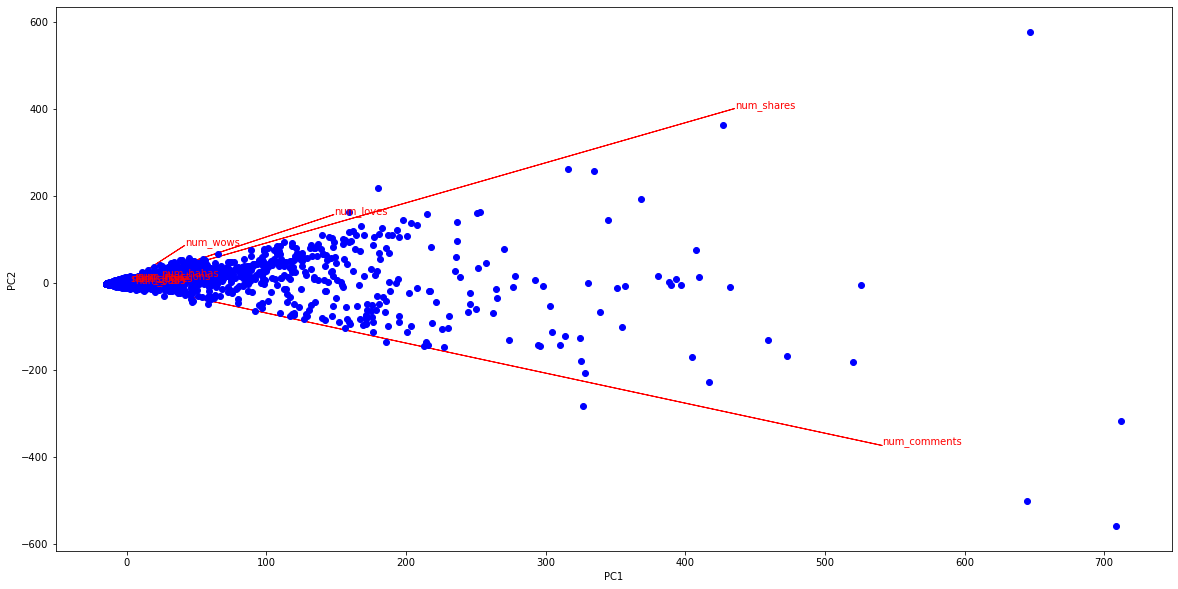

In [458]:
xvector = loadings[0] 
yvector = loadings[1]

xs = pca_components[:,0]
ys = pca_components[:,1]

# visualize projections
    
plt.figure(figsize=(20, 10))
for i in range(len(xvector)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
        color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs), yvector[i]*max(ys),
        list(X.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.show()

Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

## K-Means

The **elbow method** is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

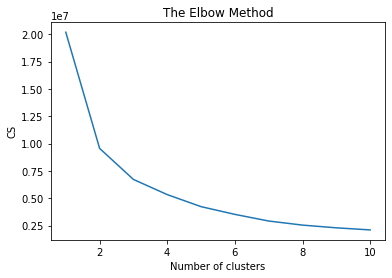

In [459]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

By the above plot, we can see that there is a kink at k=2.

Hence k=2 can be considered a good number of the cluster to cluster this data.

In [460]:
kmeans = KMeans(n_clusters=2, init = 'k-means++', max_iter = 400, n_init = 20,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4593 out of 7050 samples were correctly labeled.
Accuracy score: 0.65


We have achieved a relatively high accuracy of 65% with k=2.

In [461]:
kmeans.inertia_

9560865.745313725

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

Our inertia is very high so it is not a good model fit.

In [462]:
llabel=pd.Series(kmeans.labels_)
llabel.unique()

array([0, 1])

In [463]:
fb_posts_type['Predicted clusters K-means']=kmeans.labels_
fb_posts_type

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Predicted clusters K-means
0,1.0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0
1,0.0,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0
2,1.0,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0
3,0.0,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0
4,0.0,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,0.0,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,0
7046,0.0,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,0
7047,0.0,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,0
7048,0.0,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,0


Visualization of each feature distribution per cluster:

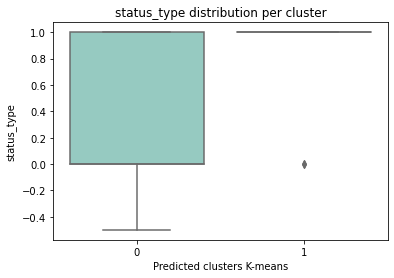

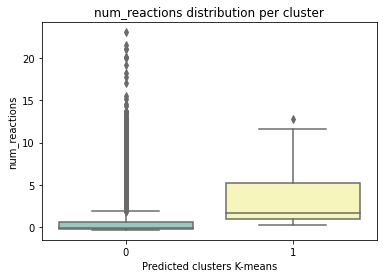

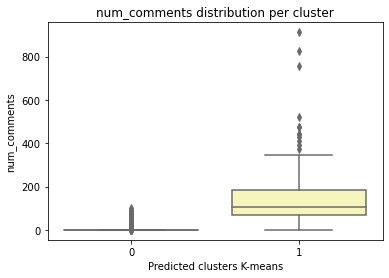

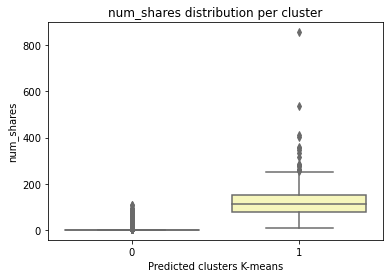

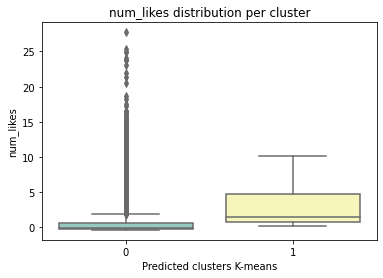

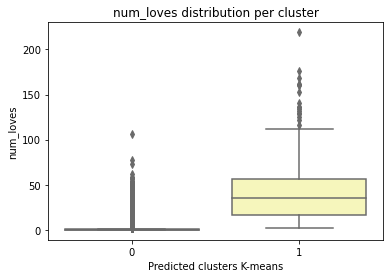

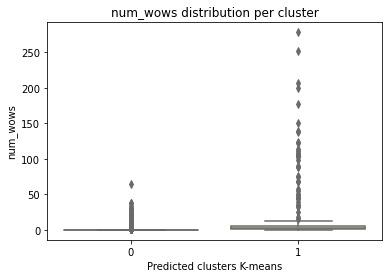

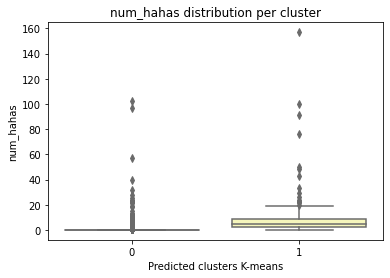

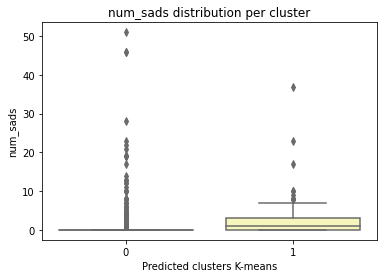

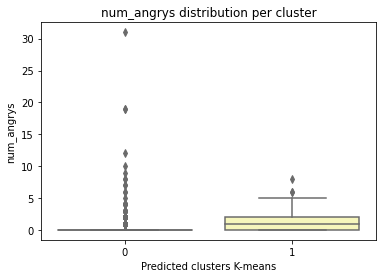

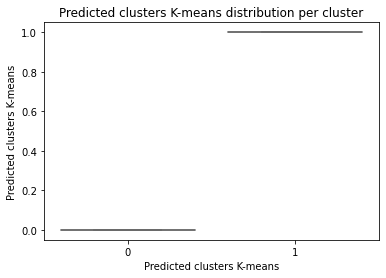

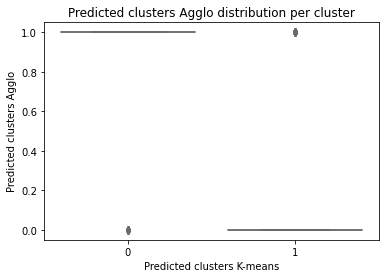

In [482]:
for i in fb_posts_type:
    sns.boxplot(data = fb_posts_type, y = i, x = "Predicted clusters K-means", palette = "Set3")
    plt.title("{} distribution per cluster".format(i))
    plt.show()

In [467]:
fb_posts_type[fb_posts_type['status_type']==0]['Predicted clusters K-means'].value_counts()

0    4286
1       2
Name: Predicted clusters K-means, dtype: int64

In [468]:
fb_posts_type[fb_posts_type['status_type']==1]['Predicted clusters K-means'].value_counts()

0    2027
1     307
Name: Predicted clusters K-means, dtype: int64

In [469]:
fb_posts_type[fb_posts_type['status_type']==0.5]['Predicted clusters K-means'].value_counts()

0    365
Name: Predicted clusters K-means, dtype: int64

In [470]:
fb_posts_type[fb_posts_type['status_type']==-0.5]['Predicted clusters K-means'].value_counts()

0    63
Name: Predicted clusters K-means, dtype: int64

<u>*Exercice 2*<u>

*Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.*

We begin by treating each data point as its own cluster. Then, we join clusters together that have the shortest distance between them to create larger clusters. This step is repeated until one large cluster is formed containing all of the data points.

Hierarchical clustering requires us to decide on both a distance and linkage method. We will use euclidean distance and the Ward linkage method, which attempts to minimize the variance between clusters.

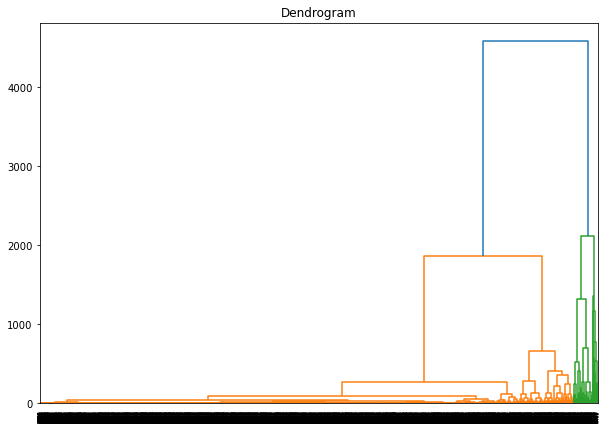

In [471]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))  
plt.title("Dendrogram")  
shc.dendrogram(shc.linkage(pca_df, method = "ward"))
plt.show()

In [472]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")  
agglo.fit_predict(pca_df)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [473]:
pca_df["predicted_cluster"] = agglo.labels_
pca_df

,principal component 1,principal component 2,predicted_cluster
0,49.100728,37.985931,1
1,-14.528279,-2.021949,1
2,3.548261,3.339022,1
3,-14.532378,-2.028285,1
4,-13.896540,-1.194413,1
...,...,...,...
7045,-14.534690,-2.031860,1
7046,-14.438746,-1.926111,1
7047,-14.474375,-1.955185,1
7048,-10.607933,1.677201,1


In [474]:
fb_posts_type['Predicted clusters Agglo']= agglo.labels_
fb_posts_type

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Predicted clusters K-means,Predicted clusters Agglo
0,1.0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0,1
1,0.0,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0,1
2,1.0,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0,1
3,0.0,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0,1
4,0.0,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.0,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,0,1
7046,0.0,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,0,1
7047,0.0,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,0,1
7048,0.0,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,0,1


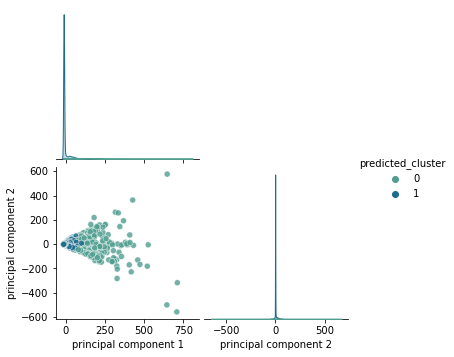

In [475]:
# matrix plot of the clusters' distribution among the pca 
sns.pairplot(pca_df, diag_kind = "auto", corner = True, hue = "predicted_cluster", plot_kws = dict(alpha = 0.8), palette='crest')
plt.show()

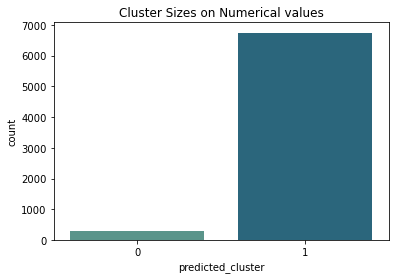

In [476]:
sns.countplot(x = pca_df.predicted_cluster, palette = 'crest').set(title = "Cluster Sizes on Numerical values")
plt.show()

Visualization of each feature distribution per cluster:

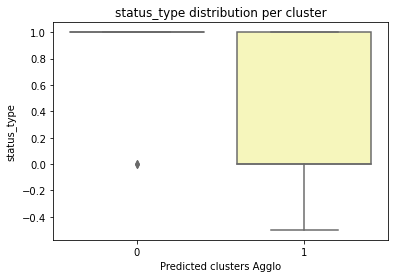

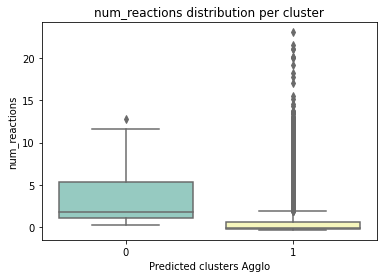

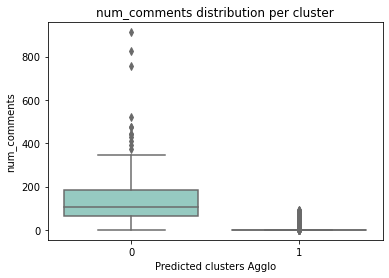

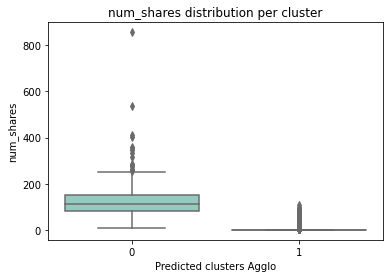

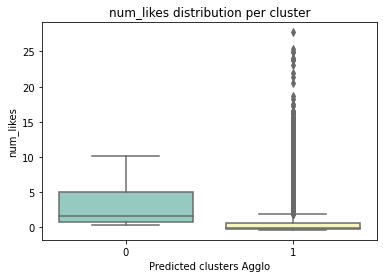

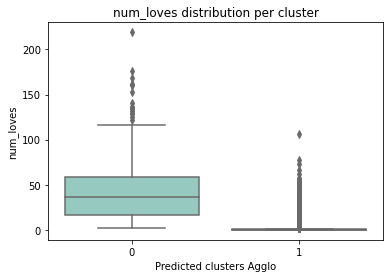

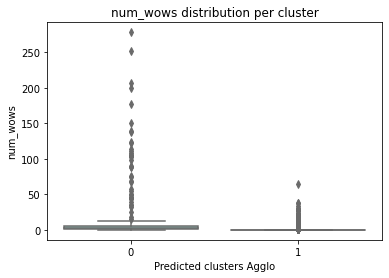

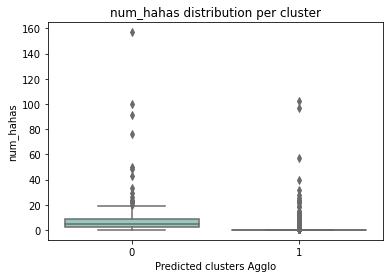

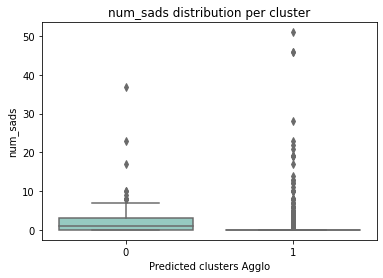

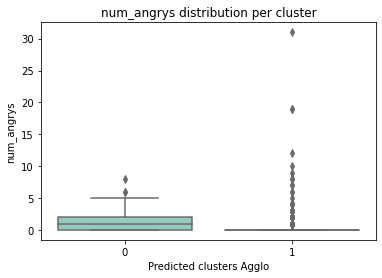

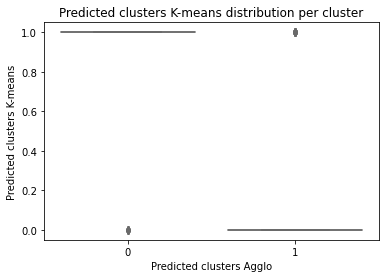

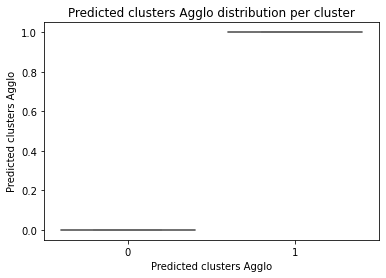

In [481]:
for i in fb_posts_type:
    sns.boxplot(data = fb_posts_type, y = i, x = "Predicted clusters Agglo", palette = "Set3")
    plt.title("{} distribution per cluster".format(i))
    plt.show()

<u>*Exercice 3*<u>

*Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.*

In [477]:
from sklearn.metrics import silhouette_score

num_silhouette = silhouette_score(pca_components, agglo.labels_).round(2)

print("Silhouette score for numerical clusters:", num_silhouette)

Silhouette score for numerical clusters: 0.9


## Conclusions

- K-means is not a good model for our data. We achieve a relatively high accuracy of 65% with k = 2 but the inertia is very high.

- Otherwise, with agglomerative clustering we have the same number of clusters and a very high silhouette score which means that this model performs better with our data.